In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file=pd.read_csv('spam.csv',encoding='latin1')
file

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df=file.copy()

### Data cleaning

In [4]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.columns=['target','sms']

In [7]:
from sklearn.preprocessing import LabelEncoder
df['target']=LabelEncoder().fit_transform(df['target'])

In [8]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates()
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.shape

(5169, 2)

### EDA

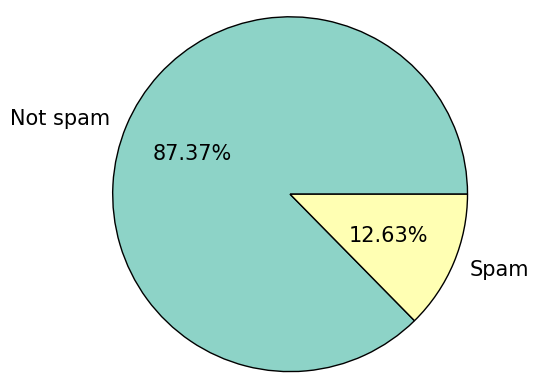

In [12]:
plt.pie(df['target'].value_counts(),labels=['Not spam','Spam'],autopct='%.2f%%',
        colors=sns.color_palette('Set3',n_colors=2)[:],textprops={'fontsize':15},radius=1.2,wedgeprops={'ec':'k'})
plt.show()

In [13]:
df['characters']=df['sms'].apply(lambda x:len(''.join(x.split())))

In [14]:
from nltk.tokenize import word_tokenize,sent_tokenize
df['words']=df['sms'].apply(lambda x:len(word_tokenize(x)))
df['sentences']=df['sms'].apply(lambda x:len(sent_tokenize(x)))

In [15]:
df.head()

,target,sms,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",92,24,2
1,0,Ok lar... Joking wif u oni...,24,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,128,37,2
3,0,U dun say so early hor... U c already then say...,39,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",49,15,1


In [16]:
df[df['target']==0].iloc[:,2:].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,57.199070,17.120903,1.799601
std,45.374978,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,28.000000,8.000000,1.000000
50%,43.000000,13.000000,1.000000
75%,73.000000,22.000000,2.000000
max,740.000000,220.000000,28.000000


In [17]:
df[df['target']==1].iloc[:,2:].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,115.162328,27.667688,2.967841
std,25.128956,7.008418,1.483201
min,12.000000,2.000000,1.000000
25%,109.000000,25.000000,2.000000
50%,123.000000,29.000000,3.000000
75%,131.000000,32.000000,4.000000
max,191.000000,46.000000,8.000000


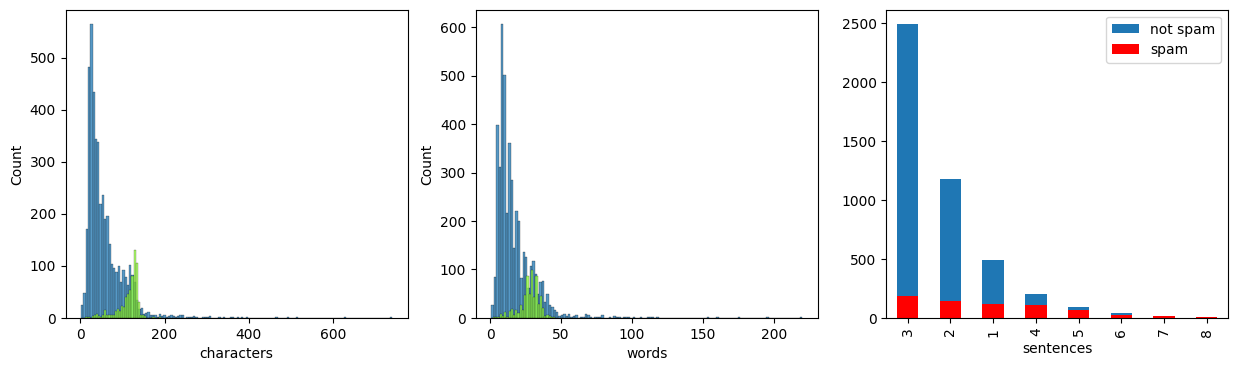

In [18]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
l=['characters','words','sentences']
for i in range(len(l)-1):
    sns.histplot(df[df['target']==0][l[i]],ax=eval('ax'+str(i+1)))
    sns.histplot(df[df['target']==1][l[i]],color='#95FF3C',ax=eval('ax'+str(i+1)))
df[df['target']==0]['sentences'].value_counts().plot(kind='bar',ax=ax3,label='not spam')
df[df['target']==1]['sentences'].value_counts().plot(kind='bar',color='r',ax=ax3,label='spam')
plt.legend()
plt.show()

<Axes: >

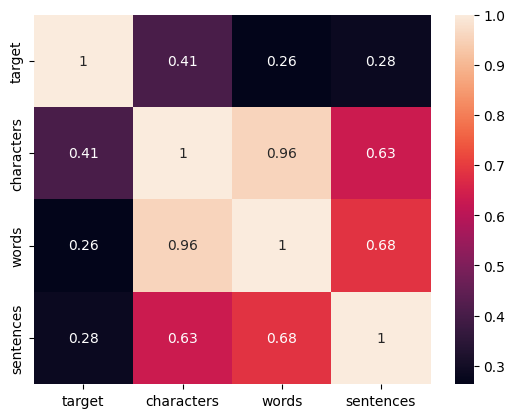

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Text preprocessing

In [160]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [21]:
def vector_text(text):
#lowering case
    text=text.lower()
#removing punctuation
    text=text.translate(str.maketrans('','',string.punctuation))
#removing stopwords and doing text tokenization and stemming
    ps=PorterStemmer()
    text=' '.join([ps.stem(word) for word in word_tokenize(text) if word not in stopwords.words('english')])
    return text

In [22]:
df['transformed_text']=df['sms'].apply(vector_text)

In [23]:
from PIL import Image
maski=np.array(Image.open('comment.png'))

In [24]:
from wordcloud import WordCloud 
wc1=WordCloud(width=2000,height=2000,min_font_size=10,colormap='magma',background_color='white',mask=maski)
wc2=WordCloud(width=2000,height=2000,min_font_size=10,background_color='white',mask=maski)

In [25]:
cloud1=wc1.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
cloud2=wc2.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

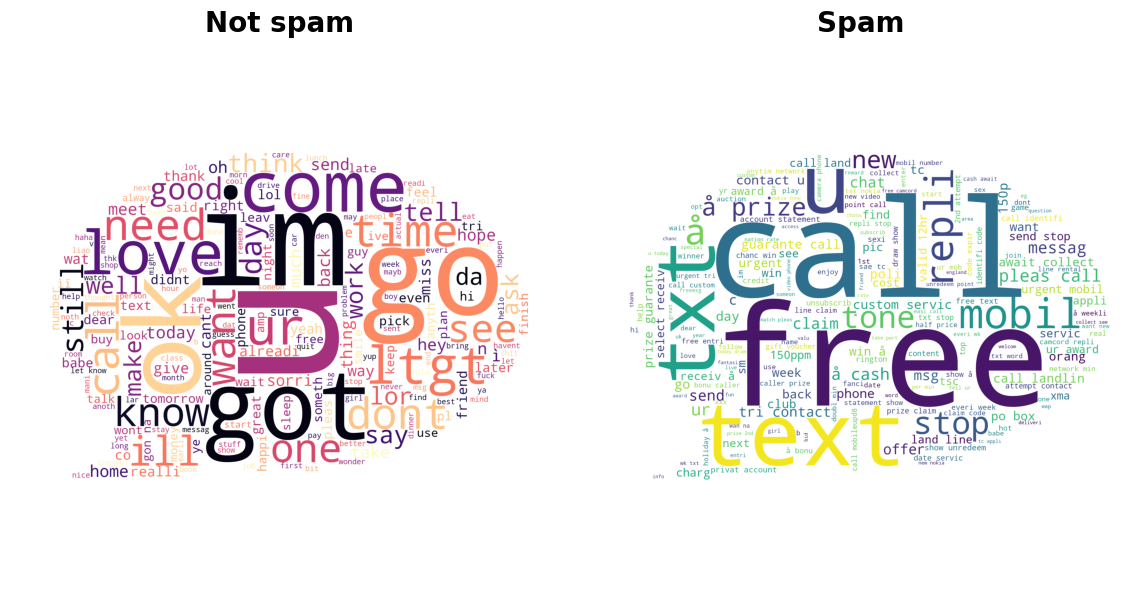

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
plt.subplots_adjust(wspace=0)
plt.subplots_adjust(wspace=0)
ax1.imshow(cloud1)
ax2.imshow(cloud2)
ax1.set_title('Not spam',fontsize=20,fontweight='bold')
ax2.set_title('Spam',fontsize=20,fontweight='bold')
ax1.axis('off')
ax2.axis('off')
plt.show()

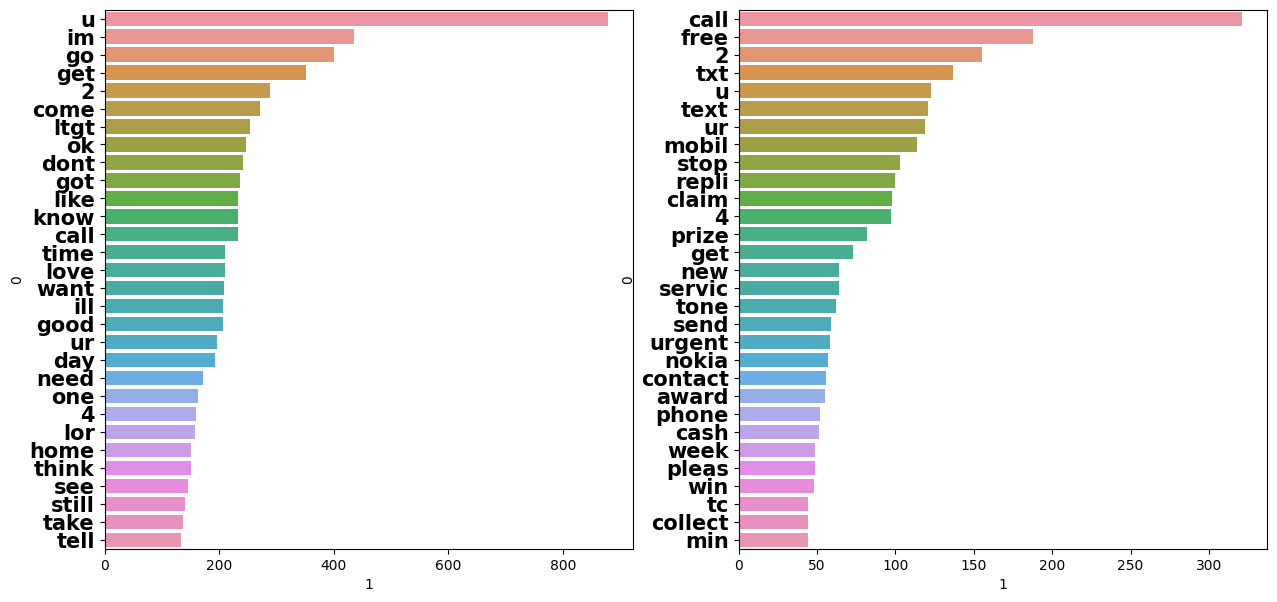

In [27]:
from collections import Counter
words=df[df['target']==0]['transformed_text'].str.cat(sep=' ').split()
df1=pd.DataFrame(Counter(words).most_common(30))
words1=df[df['target']==1]['transformed_text'].str.cat(sep=' ').split()
df2=pd.DataFrame(Counter(words1).most_common(30))
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(y=df1[0],x=df1[1])
plt.yticks(fontsize=15,fontweight='bold')
plt.subplot(122)
sns.barplot(y=df2[0],x=df2[1])
plt.yticks(fontsize=15,fontweight='bold')
plt.show()

### Modelling

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X.shape

(5169, 3000)

In [30]:
y=df['target'].values
y.shape

(5169,)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [33]:
gnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)

MultinomialNB()

Accuracy score: 0.8752417794970987
Precision score: 0.5130434782608696


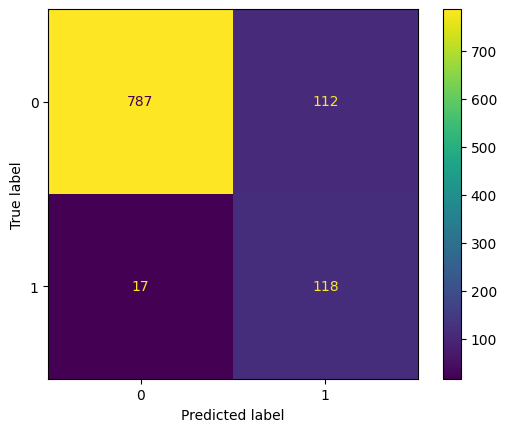

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,ConfusionMatrixDisplay,RocCurveDisplay
y_pred1=gnb.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred1))
print('Precision score:',precision_score(y_test,y_pred1))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1)).plot()
plt.show()

Accuracy score: 0.9748549323017408
Precision score: 0.9823008849557522


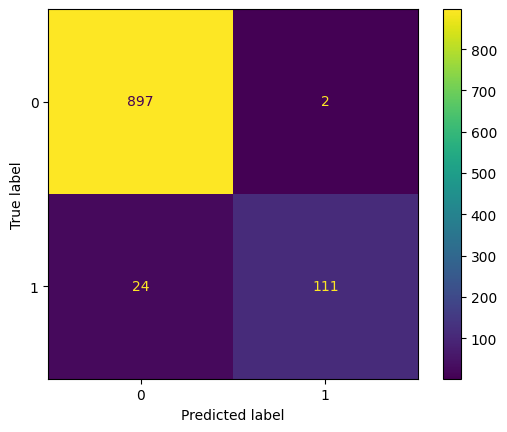

In [39]:
y_pred2=bnb.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred2))
print('Precision score:',precision_score(y_test,y_pred2))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred2)).plot()
plt.show()

Accuracy score: 0.9671179883945842
Precision score: 1.0


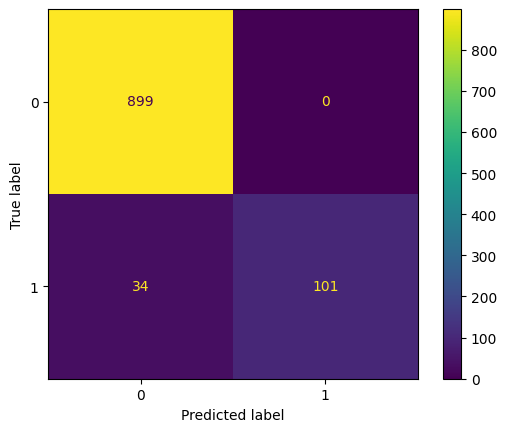

In [41]:
y_pred3=mnb.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred3))
print('Precision score:',precision_score(y_test,y_pred3))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred3)).plot()
plt.show()

**After trying all classification algorithms precision score is optimum in Multinoulli NB, since precision matters in this type of problem with tfidf vectorizer**

In [43]:
import pickle
pickle.dump(tfidf,open('tfidfv','wb'))
pickle.dump(mnb,open('mnbc','wb'))